# Black Friday Data Analysis

<u>Problem Statement:</u>

A retail company “XYZ Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and total purchase_amount from last month.

In [58]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [59]:
# Import both data files

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [60]:
# print data

df_train.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [61]:
# Print data

df_test.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN


In [62]:
# Numbers of rows and columns

df_train.shape

(550068, 12)

In [63]:
# Numbers of rows and columns

df_test.shape

(233599, 11)

In [64]:
# Merging both files

df = pd.concat([df_train, df_test])

The `pd.concat()` function combines the two DataFrames along the rows (axis=0)

In [65]:
# Printing data

df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0


In [66]:
# Numbers of rows and columns

df.shape

(783667, 12)

## Besic Info

In [67]:
# Information of data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


`df.info()` function prints all the basic information of DataFrame. As we can see, there are a total of 7,83,667 rows and 12 columns. Some fields are int, object, and float. Also, there are some missing values in Product_Category_2, Product_Category_3, and Purchase columns. Which needs to be fixed.

In [68]:
# Describe the data

df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


`df.describe()` function describes the data in detail. By seeing the std, min, 25% quarter, 50% quarter, 75% quarter, and max, the data is well described and also quite well distributed.

In [69]:
# Checking null values

df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

`isnull()` function checks the null values by column in the data. Yes, there are a lot of null values in the data frame.

In [70]:
# Checking total null values

df.isnull().sum().sum()

1025390

There are a total of 1025390 null values in the DataFrame. Which needs to be fixed. So, let's manage those.

In [71]:
# Replacing null values with mode()

df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [72]:
# Checking null values

df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

Finally, we cleaned both product categories.

In [73]:
# dropping 'User_ID' 

df.drop(['User_ID'], axis=1, inplace=True)

I'm dropping 'User_ID' because this is not relevant to our analysis.

## Data Adaption

Well, there are three categorical values in the data frame, which need to be numerical for performing modeling. So, I'm using a total of 3 methods for converting.

##### Method 1: Converting categorical to numerical

In [74]:
# Converting categorical to numerical though get_dummies

df['Gender'] = pd.get_dummies(df['Gender'], drop_first = True)

`pd.get_dummies` converts the categorical values to numerical. In this example, we have two unique values *'Female'* and *'Male'*. So, the *'Female'* value converts to 0, and the *'Male'* value converts to 1.

In [75]:
# Convert boolean to numerical (1 and 0)

df['Gender'] = df['Gender'].astype(int)

In [76]:
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,P00285442,1,55+,16,C,4+,0,8,8.0,16.0,7969.0


As we can see, the 'Gender' column is changed to 0 and 1.

##### Method 2: Converting categorical to numerical

In [77]:
# Unique values in a column

df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [78]:
# Converting categorical to numerical though map

df['Age'] = df['Age'].map({
    '0-17': 0, 
    '55+': 6, 
    '26-35': 2,
    '46-50': 4,
    '51-55': 5, 
    '36-45': 3, 
    '18-25': 1
})

In [79]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057.0
4,P00285442,1,6,16,C,4+,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,2,15,B,4+,1,8,8.0,16.0,NaN
233595,P00254642,0,2,15,B,4+,1,5,8.0,16.0,NaN
233596,P00031842,0,2,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,4,1,C,4+,0,10,16.0,16.0,NaN


All Age range is converted to numerical.

###### Method 3: Converting categorical to numerical

In [80]:
# Unique values in a column

df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [81]:
# Converting categorical to numerical though LabelEncoder

from sklearn.preprocessing import LabelEncoder
lnl = LabelEncoder()
df['City_Category'] = lnl.fit_transform(df['City_Category']) 

In [82]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,1,6,16,2,4+,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,2,15,1,4+,1,8,8.0,16.0,NaN
233595,P00254642,0,2,15,1,4+,1,5,8.0,16.0,NaN
233596,P00031842,0,2,15,1,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,4,1,2,4+,0,10,16.0,16.0,NaN


As we can see, city categories changed to 0, 1, and 2.

In [83]:
# Removing '+' sign in 'Stay_In_Current_City_Years' column

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [84]:
# Converting datatype

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 71.7+ MB


Well, as we can see we changed all the categorical values to int64. So, now all the data is in numeric. Now, we can perform EDA and modeling. So, let's do it.

## EDA

In [86]:
# Setting the style to 'fivethirtyeight' and setting up the figure size

plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))

import warnings
warnings.filterwarnings("ignore")

<Figure size 1300x700 with 0 Axes>

<Axes: xlabel='Gender', ylabel='count'>

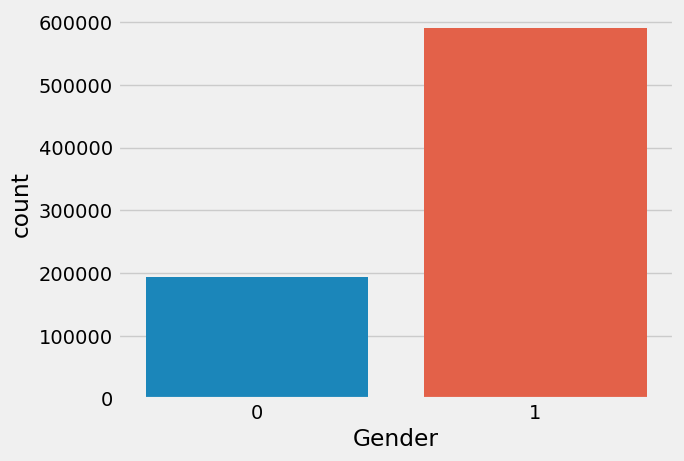

In [87]:
# Display the count plot

sns.countplot(x = 'Gender', data=df)

Interestingly, according to the data men purchased more than female on Black Friday.

<Axes: xlabel='Purchase', ylabel='Density'>

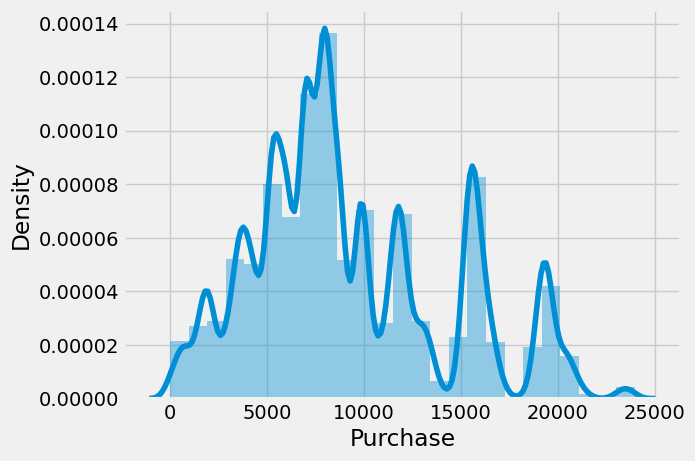

In [88]:
# Display the distribution plot

sns.distplot(df['Purchase'], bins=25)

Well, looking at the plot distribution looks good. So, we can analyze it in detail.

<Axes: xlabel='Age', ylabel='count'>

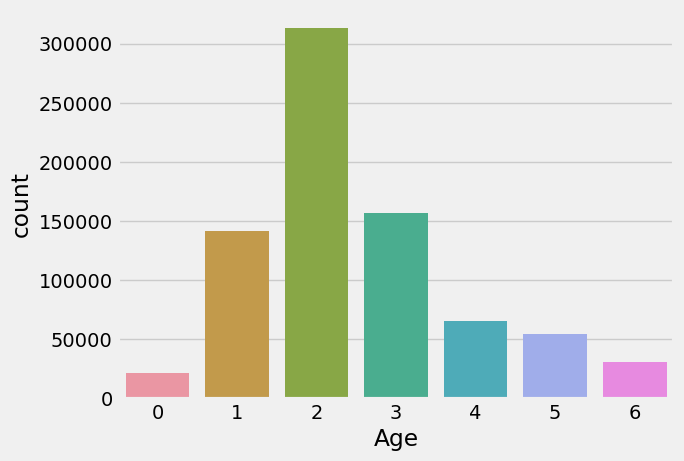

In [89]:
# Display the count plot

sns.countplot(x='Age', data=df)

So, the age group between 26 to 35 is more willing to buy more products on Black Friday.

<Axes: xlabel='Marital_Status', ylabel='count'>

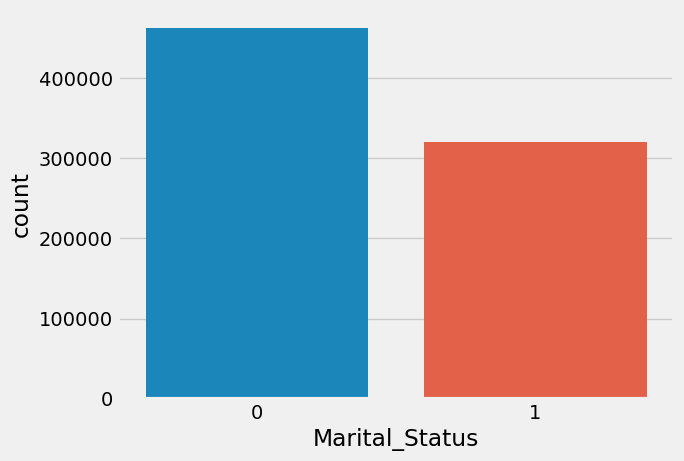

In [90]:
# Display the count plot

sns.countplot(x ='Marital_Status', data=df)

By looking at the graph, more non-married people are buying more stuff on black friday than married people.

## Visualization

<Axes: xlabel='Age', ylabel='Purchase'>

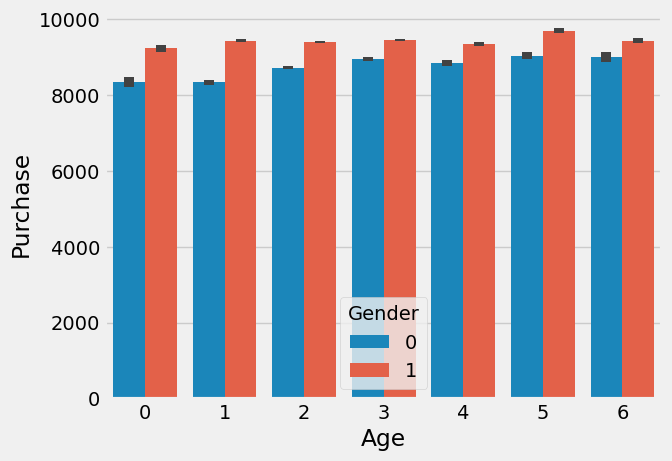

In [91]:
# Age vs Purchase

sns.barplot(x = 'Age', y = 'Purchase', hue='Gender', data=df)

Almost every age group purchases the same amount of items similarly. And as we have seen already Males are more interested in buying products from Black Friday.

<Axes: xlabel='City_Category', ylabel='Purchase'>

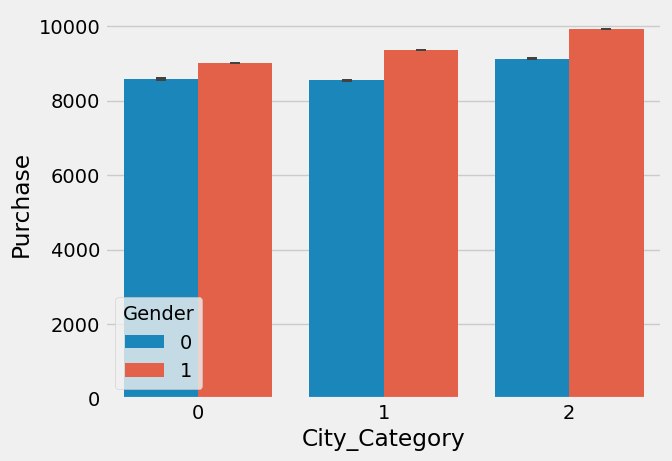

In [92]:
# City_Category vs Purchase

sns.barplot(x = 'City_Category', y = 'Purchase', hue='Gender', data=df)

Based on the Gender 'C' city category male residents are more buying than other category's females.

### Train and Test the data

In [93]:
# Selecting only valid entries

df_train = df[~df['Purchase'].isnull()]

In [94]:
# Printing first 5 values

df_train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,0,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0,10,0,2,0,12,14.0,16.0,1057.0
4,P00285442,1,6,16,2,4,0,8,8.0,16.0,7969.0


In [95]:
# Assigning values to X and y

X = df_train.drop('Purchase', axis = 1)
y = df_train['Purchase']

X valuable has all the fields expect out target variable and y have our target variable which is 'Purchase'.

In [96]:
# Printing first 5 values

X.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,0,0,10,0,2,0,3,8.0,16.0
1,P00248942,0,0,10,0,2,0,1,6.0,14.0
2,P00087842,0,0,10,0,2,0,12,8.0,16.0
3,P00085442,0,0,10,0,2,0,12,14.0,16.0
4,P00285442,1,6,16,2,4,0,8,8.0,16.0


In [97]:
# Printing first 5 values

y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

##### Model 1: Linear Regression

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
# Splitting training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [100]:
# Dropping column

X_train.drop('Product_ID', axis=1, inplace = True)
X_test.drop('Product_ID', axis=1, inplace = True)

I'm dropping 'Product_ID' because it is no longer necessary.

In [101]:
# Storing StandardScaler() in variable
sc = StandardScaler()

# training and testing the data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [102]:
X_train

array([[ 0.57161057,  1.85014027, -0.16497953, ..., -1.11858944,
         1.33681956,  0.36894971],
       [ 0.57161057, -1.10508507,  0.60178047, ..., -0.10257906,
        -0.29315907,  0.36894971],
       [ 0.57161057, -0.36627874, -0.47168354, ...,  0.65942872,
         1.10396547,  0.73408751],
       ...,
       [-1.74944281, -1.10508507, -1.08509154, ..., -0.10257906,
        -0.29315907,  0.36894971],
       [-1.74944281, -1.10508507, -0.62503554, ...,  0.65942872,
         1.10396547,  0.36894971],
       [-1.74944281, -1.10508507, -0.93173954, ..., -0.10257906,
         1.10396547,  0.36894971]])

In [103]:
# Performing and fitting LinearRegression model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [104]:
# Make predictions on the test set

y_pred = model.predict(X_test)

In [105]:
# Evaluate the Linear Regression model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression Mean Squared Error: {mse}')
print(f'Linear Regression R-squared: {r2}')

Linear Regression Mean Squared Error: 21857326.23435826
Linear Regression R-squared: 0.13009752050368673


Well, the Mean Squared Error(21857326) and R-squared(13%) output are quite low. So, let's perform another model.

##### Model 2: Random Forest Regressor

In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
# Create a Random Forest Regressor model

rf_model = RandomForestRegressor(random_state=42)

In [108]:
# Train the model

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [109]:
# Make predictions on the test set

y_pred_rf = rf_model.predict(X_test)

In [110]:
# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')

Random Forest Mean Squared Error: 9312695.29704562
Random Forest R-squared: 0.6293628670390986


So, by using Random Forest, we got enough output of  R-squared(63%) and Mean Squared Error(9312695).

## Final Report

#### Recommendation:

Based on the results, it is recommended to prioritize the use of the Random Forest model for predicting purchase amounts during Black Friday. This model demonstrates better predictive performance and captures a larger portion of the variability in purchase behavior.

#### Strategy Adjustment:

Stakeholders may consider leveraging insights from the random forest model to tailor marketing strategies, promotions, or product recommendations